# BMP를 CSV 파일로 변환


In [6]:
import os
import csv
from PIL import Image
import numpy as np

def process_bmp_folder(input_folder, output_csv):
    """
    BMP 파일이 여러 폴더에 저장되어 있는 데이터를 읽어와 CSV 파일로 변환합니다.

    Args:
        input_folder (str): BMP 파일이 있는 최상위 폴더 경로
        output_csv (str): 생성될 CSV 파일 경로
    """
    # CSV 파일 열기
    with open(output_csv, mode='w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        # 각 폰트 폴더를 탐색
        for font_folder in os.listdir(input_folder):
            font_path = os.path.join(input_folder, font_folder)

            # 폰트 폴더인지 확인
            if not os.path.isdir(font_path):
                continue

            print(f"Processing folder: {font_folder}")

            # BMP 파일 탐색
            for bmp_file in sorted(os.listdir(font_path)):
                if not bmp_file.endswith('.bmp'):
                    continue

                # BMP 파일의 유니코드 값을 타겟값으로 사용 (예: AC00 → 타겟값)
                target_char = bmp_file.split('.')[0]
                target_value = int(target_char, 16)

                # BMP 파일 읽기
                bmp_path = os.path.join(font_path, bmp_file)
                img = Image.open(bmp_path).convert('L')  # Grayscale 변환
                img = img.resize((64, 64), Image.Resampling.LANCZOS)  # 28x28로 크기 조정
                img_data = np.asarray(img).flatten()  # 1D 배열로 변환

                # 입력 데이터 스케일링 (0.01 ~ 1.0)
                scaled_data = (img_data / 255.0 * 0.99) + 0.01

                # CSV 한 줄 구성: [타겟값, 입력 데이터...]
                row = [target_value] + scaled_data.tolist()
                csv_writer.writerow(row)

        print(f"CSV 파일 생성 완료: {output_csv}")

# 사용 예시
input_folder = "../Image"  # BMP 파일이 있는 최상위 폴더 경로
output_csv = "../Data/font_data.csv"  # 생성될 CSV 파일 경로
process_bmp_folder(input_folder, output_csv)


Processing folder: NanumSquareNeo-aLt
Processing folder: MaruBuri-Bold
Processing folder: NanumGothic
CSV 파일 생성 완료: ../Data/font_data.csv


# csv 파일에서 값 들고와서 plot 그려보기
데이터 제대로 생성됐는지 확인하기


Target Value: 44036


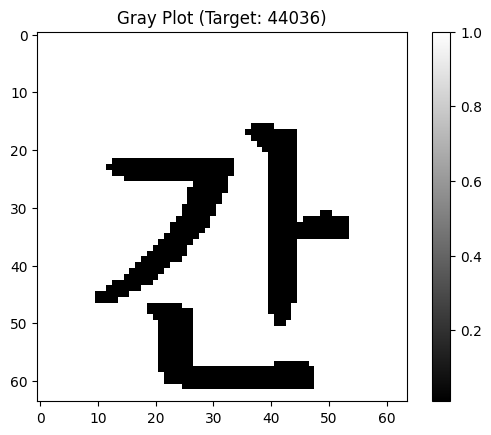

In [10]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def plot_csv_data(csv_file, row_index=0):
    """
    CSV 파일에서 특정 행의 데이터를 28x28 그레이스케일 플롯으로 시각화합니다.
    
    Args:
        csv_file (str): CSV 파일 경로
        row_index (int): 시각화할 행의 인덱스 (기본값: 0번째 행)
    """
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        rows = list(reader)
        
        # 선택한 행 가져오기
        selected_row = rows[row_index]
        
        # 0번째 값 (타겟값) 출력
        target_value = selected_row[0]
        print(f"Target Value: {target_value}")
        
        # 1번째 값부터 끝까지 가져와서 28x28로 변환
        pixel_data = np.array(selected_row[1:], dtype=float).reshape((64, 64))
        
        # 이미지 플롯
        plt.imshow(pixel_data, cmap='gray')
        plt.title(f"Gray Plot (Target: {target_value})")
        plt.colorbar()
        plt.show()

# 사용 예시
csv_file = "../Data/font_data.csv"  # 생성한 CSV 파일 경로
plot_csv_data(csv_file, row_index=155)
